In [12]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
data = Path('/Users/jarl/2d-discharge-nn/data/interpolation_datasets/rec-interpolation2.nc')

Import xarray data and extract a single "image"

In [3]:
ds = xr.open_dataset(data)
ds['potential (V)'].sel(V=300,P=5)

<xarray.DataArray 'potential (V)' (y: 707, x: 200)>
[141400 values with dtype=float64]
Coordinates:
  * y        (y) float64 0.0 0.001 0.002 0.003 0.004 ... 0.703 0.704 0.705 0.706
  * x        (x) float64 0.0 0.001 0.002 0.003 0.004 ... 0.196 0.197 0.198 0.199
    P        float64 5.0
    V        float64 300.0

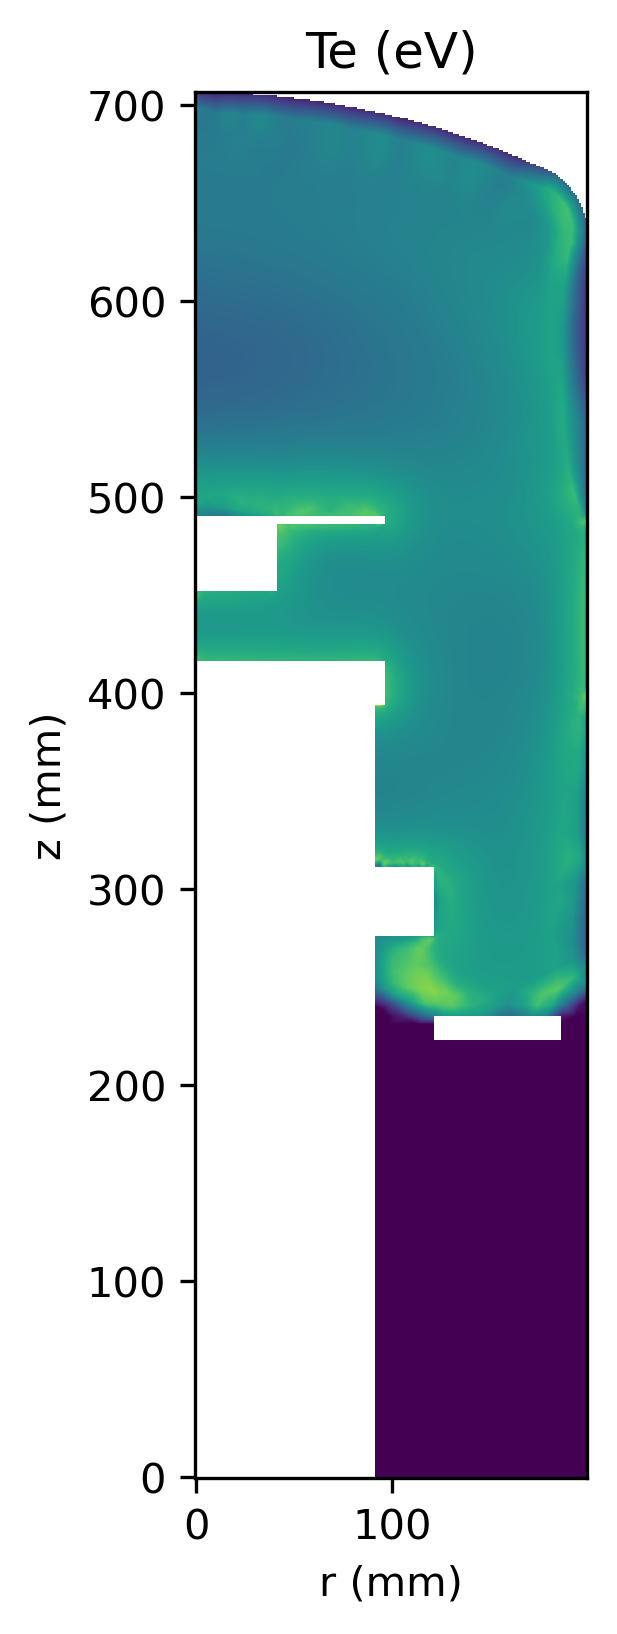

In [45]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 6))
ax.imshow(ds['Te (eV)'].sel(V=300,P=45), cmap='viridis', origin='lower')
ax.set_aspect('equal')
ax.set_title('Te (eV)')
ax.set_ylabel('z (mm)')
ax.set_xlabel('r (mm)')
fig.savefig('/Users/jarl/Documents/阪大/research/ICDDPS-4/poster/grid.png', bbox_inches='tight')

In [7]:
avg_data= Path('/Users/jarl/2d-discharge-nn/data/avg_data.feather')
mesh_df = pd.read_feather(avg_data)

In [8]:
mesh_df.head()

,Vpp [V],P [Pa],X,Y,potential (V),Ne (#/m^-3),Ar+ (#/m^-3),Nm (#/m^-3),Te (eV)
0,200,5,0.182960,0.259570,54.1093,2.197450e+12,1.487970e+13,1.390060e+15,4.50207
1,200,5,0.172908,0.266347,70.7925,2.533790e+13,3.271110e+13,3.294800e+15,4.37958
2,200,5,0.173172,0.254322,58.4792,4.221430e+12,1.612710e+13,1.660740e+15,4.42511
3,200,5,0.176840,0.246447,39.4285,3.241290e+10,1.010190e+13,8.185030e+14,4.52327
4,200,5,0.170305,0.246504,44.2009,1.125090e+11,1.214620e+13,9.711210e+14,4.48925


In [22]:
dataset = mesh_df.loc[(mesh_df['Vpp [V]'] == 300) & (mesh_df['P [Pa]'] == 45)]

In [23]:
dataset[['X', 'Y', 'Te (eV)']].head()

,X,Y,Te (eV)
206536,0.182960,0.259570,3.48589
206537,0.172908,0.266347,3.36180
206538,0.173172,0.254322,3.37078
206539,0.176840,0.246447,4.43148
206540,0.170305,0.246504,3.85048


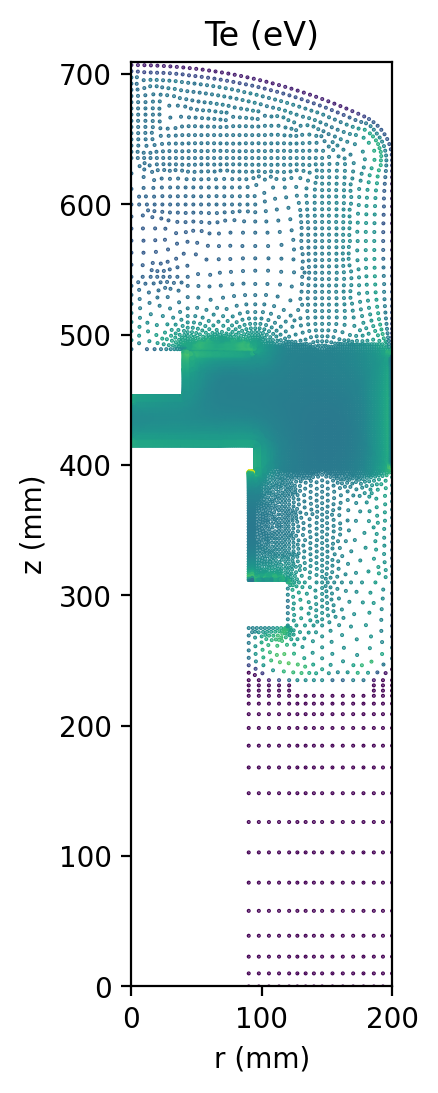

In [44]:
fig, ax = plt.subplots(dpi=200, figsize=(12, 6))
ax.scatter(dataset['X']*1000, dataset['Y']*1000, c=dataset['Te (eV)'], cmap='viridis', s=0.2)
ax.set_aspect('equal')
ax.set_title('Te (eV)')
ax.set_ylabel('z (mm)')
ax.set_xlabel('r (mm)')
ax.set_ylim(0, 709)
ax.set_xlim(0, 200)
fig.savefig('/Users/jarl/Documents/阪大/research/ICDDPS-4/poster/mesh.png', bbox_inches='tight', dpi=300)

In [5]:
loss_data = Path('/Volumes/Salmon/research/2D_NN/created_models/2023-04-26_1557/losses.csv')
loss = pd.DataFrame(pd.read_csv(loss_data))

In [6]:
loss.head()

,Train loss,Neighbor loss
0,0.049533,0.000068
1,0.001619,0.000143
2,0.001482,0.000579
3,0.001557,0.000404
4,0.000816,0.000830


In [10]:
loss.describe()

,Train loss,Neighbor loss
count,50.000000,50.000000
mean,0.001634,0.000738
std,0.006930,0.000370
min,0.000161,0.000068
25%,0.000284,0.000427
50%,0.000455,0.000784
75%,0.000865,0.001020
max,0.049533,0.001464


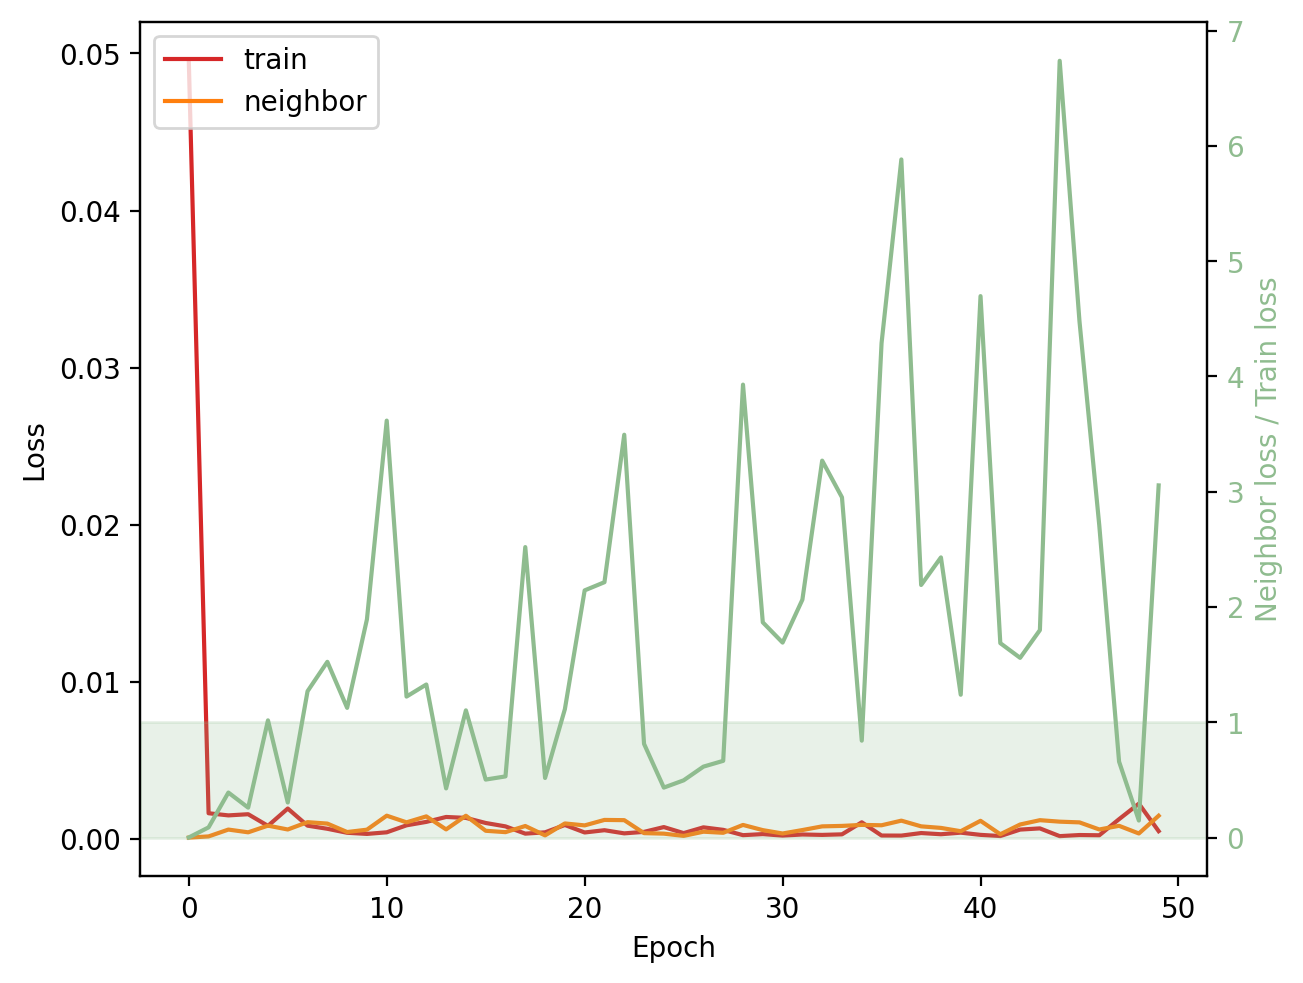

In [48]:
fig, ax = plt.subplots(layout='constrained', dpi=200)
ax.plot(loss['Train loss'], color='tab:red', label='train', )
ax.plot(loss['Neighbor loss'], color='tab:orange', label='neighbor')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')

ax1 = ax.twinx()
color = 'darkseagreen'
ax1.plot((loss['Neighbor loss']/loss['Train loss']), color=color)
ax1.set_ylabel('Neighbor loss / Train loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.axhspan(0, 1, color=color, alpha=0.2)

ax.legend(loc=2)